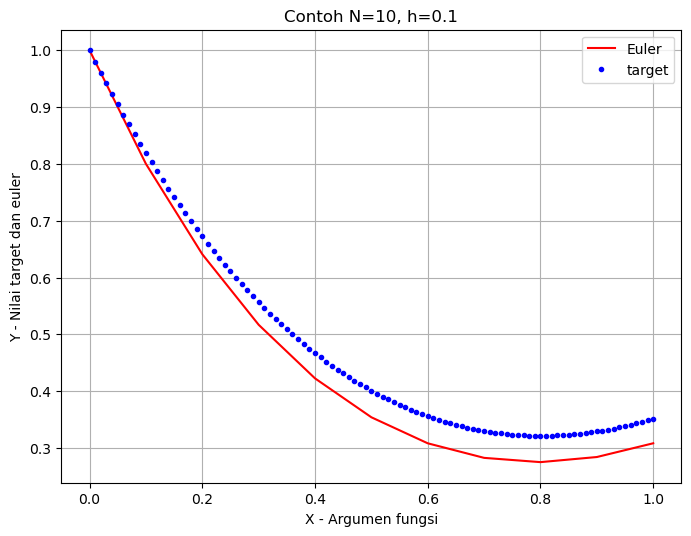

In [2]:
import matplotlib.pyplot
import math

def fun(n, h, x_0, y_0, der): 
    X = [x_0]
    Y = [y_0]
    for i in range(n):
        y_0 += h * der(x_0, y_0)
        x_0 += h
        X.append(x_0)
        Y.append(y_0)
    return X, Y

def target(a, n, h, val): 
    X = [a]
    Y = [val(a)]
    for i in range(n):
        a += h
        X.append(a)
        Y.append(val(a))
    return X, Y

def derivative(x, y):
    return x**2 - 2*y

def target_value(x):
    return (3*math.exp(-2*x) + 2*x**2 - 2*x + 1) / 4
    

matplotlib.pyplot.figure(num=None, 
                         figsize=(8, 6), 
                         dpi=100, 
                         facecolor='w', 
                         edgecolor='k')

#__Perikiraan
x, y = fun(10, 0.1, 0, 1, derivative)
matplotlib.pyplot.plot(x, 
                       y, 
                       'r-', 
                       label='Euler')

#__Target
x_1, y_1 = target(0, 100, 0.01, target_value)
matplotlib.pyplot.plot(x_1, y_1, 
                       'b.', 
                       label='target')

matplotlib.pyplot.title('Contoh N=10, h=0.1')
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("X - Argumen fungsi")
matplotlib.pyplot.ylabel("Y - Nilai target dan euler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [20]:
def deffinition(n, h, x_0, y_0, der):
    X = [x_0]
    Y = [y_0]
    for i in range(n):
        k_1 = der(x_0, y_0)
        k_2 = der(x_0 + h / 2, y_0 + h * k_1 / 2)
        k_3 = der(x_0 + h / 2, y_0 + h * k_2 / 2)
        k_4 = der(x_0 + h, y_0 + h * k_3)
        y_0 += (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        x_0 += h
        X.append(x_0)
        Y.append(y_0)
    return X, Y

def error(target, method_names, method_results):
    print("|{:^8}|{:^8}|{:^24}|".format("i", "x_i", "y_i"), end="")
    for i in range(len(method_names)):
        print("{:^16}|{:^16}|".format(method_names[i], "errors"), end="")
    print()
    for i in range(len(target[0])):
        print("|{:^8}|{:^8.6g}|{:^24.6g}|".format(i, target[0][i], target[1][i]), end="")
        for j in range(len(method_results)):
            print("{:^16.6g}|{:^16.6g}|".format(
                method_results[j][1][i], abs(target[1][i] - method_results[j][1][i])), end="")
        print()

error(target(0, 10, 0.1, target_value), ["Metode Euler"],
      [fun(10, 0.1, 0, 1, derivative), deffinition(10, 0.1, 0, 1, derivative)])

|   i    |  x_i   |          y_i           |  Metode Euler  |     errors     |
|   0    |   0    |           1            |       1        |       0        |       1        |       0        |
|   1    |  0.1   |        0.819048        |      0.8       |   0.0190481    |    0.819051    |  2.76852e-06   |
|   2    |  0.2   |        0.67274         |     0.641      |    0.03174     |    0.672745    |  4.68442e-06   |
|   3    |  0.3   |        0.556609        |     0.5168     |   0.0398087    |    0.556615    |  5.96582e-06   |
|   4    |  0.4   |        0.466997        |    0.42244     |   0.0445567    |    0.467004    |   6.7798e-06   |
|   5    |  0.5   |        0.40091         |    0.353952    |   0.0469576    |    0.400917    |  7.25372e-06   |
|   6    |  0.6   |        0.355896        |    0.308162    |   0.0477341    |    0.355903    |  7.48412e-06   |
|   7    |  0.7   |        0.329948        |    0.282529    |   0.0474184    |    0.329955    |   7.5437e-06   |
|   8    |  0.8  

In [29]:
def deffinition(n, h, x_0, y_0, der):
    X = [x_0]
    Y = [y_0]
    for i in range(n):
        k_1 = der(x_0, y_0)
        k_2 = der(x_0 + h / 2, y_0 + h * k_1 / 2)
        k_3 = der(x_0 + h / 2, y_0 + h * k_2 / 2)
        k_4 = der(x_0 + h, y_0 + h * k_3)
        y_0 += (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        x_0 += h
        X.append(x_0)
        Y.append(y_0)
    return X, Y

def error(target, method_names, method_results):
    print("|{:^8}|{:^8}|{:^24}|".format("i", "x_i", "y_i"), end="")
    for i in range(len(method_names)):
        print("{:^16}|{:^16}|".format(method_names[i], "errors"), end="")
    print()
    for i in range(len(target[0])):
        print("|{:^8}|{:^8.6g}|{:^24.6g}|".format(i, target[0][i], target[1][i]), end="")
        for j in range(len(method_results)):
            print("{:^16.6g}|{:^16.6g}|".format(
                method_results[j][1][i], abs(target[1][i] - method_results[j][1][i])), end="")
        print()

error(target(0, 10, 0.1, target_value), 
      ["Metode Euler"],
      [fun(10, 0.1, 0, 1, derivative)])

|   i    |  x_i   |          y_i           |  Metode Euler  |     errors     |
|   0    |   0    |           1            |       1        |       0        |
|   1    |  0.1   |        0.819048        |      0.8       |   0.0190481    |
|   2    |  0.2   |        0.67274         |     0.641      |    0.03174     |
|   3    |  0.3   |        0.556609        |     0.5168     |   0.0398087    |
|   4    |  0.4   |        0.466997        |    0.42244     |   0.0445567    |
|   5    |  0.5   |        0.40091         |    0.353952    |   0.0469576    |
|   6    |  0.6   |        0.355896        |    0.308162    |   0.0477341    |
|   7    |  0.7   |        0.329948        |    0.282529    |   0.0474184    |
|   8    |  0.8   |        0.321422        |    0.275023    |    0.046399    |
|   9    |  0.9   |        0.328974        |    0.284019    |   0.0449554    |
|   10   |   1    |        0.351501        |    0.308215    |   0.0432865    |
